In [1]:
import cpmpy as cp
from models import AllocationModel, SchedulingModel
from explain import FeasibilityResotorationModel
from utils import read_instance

In [2]:
instance = f"data/anon_jsons/instance_50.json"

tasks, calendars, same_allocation = read_instance(instance)

model = AllocationModel(tasks, calendars, same_allocation)
model.set_lexico_objectives([
    model.get_nb_teams_objective(),
    model.get_dispesion_objective()
])

model.solve(time_limit=5)

Objective value: 7
Objective value: 15


True

,task_id,original_start,original_end,assigned_team,start,end
0,42567,1.0,16.0,f4c91,1.0,16.0
1,17304,2.0,17.0,1c813,2.0,17.0
2,96109,0.0,30.0,73604,0.0,30.0
3,40905,15.0,30.0,867b9,15.0,30.0
4,58546,17.0,32.0,1c813,17.0,32.0
...,...,...,...,...,...,...
57,43179,329.0,374.0,b6be0,329.0,374.0
58,75523,367.0,382.0,1c813,367.0,382.0
59,15390,383.0,398.0,73604,383.0,398.0
60,38131,399.0,414.0,f4c91,399.0,414.0


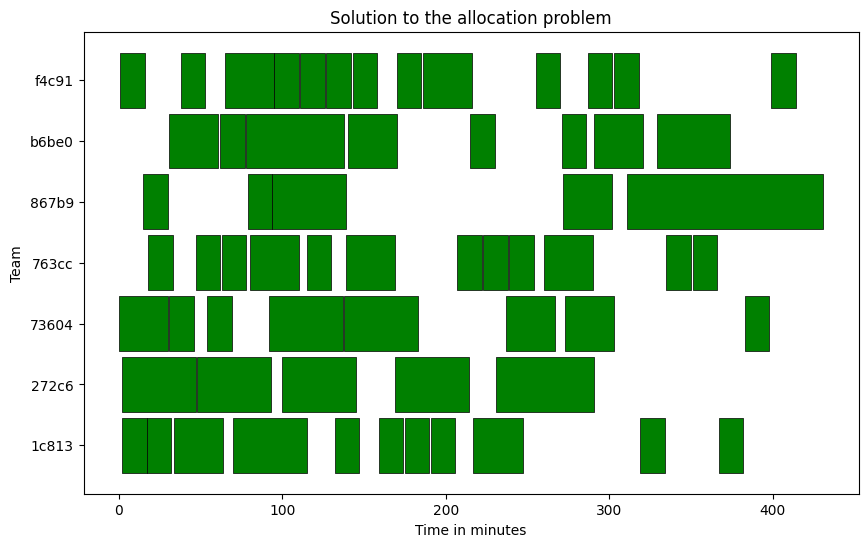

In [3]:
sol = model.get_solution()
display(sol)
model.visualize_solution()

used_teams = list(model.get_solution()['assigned_team'].unique())

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Original solution with disruptions'}, xlabel='Time in minutes', ylabel='Team'>)

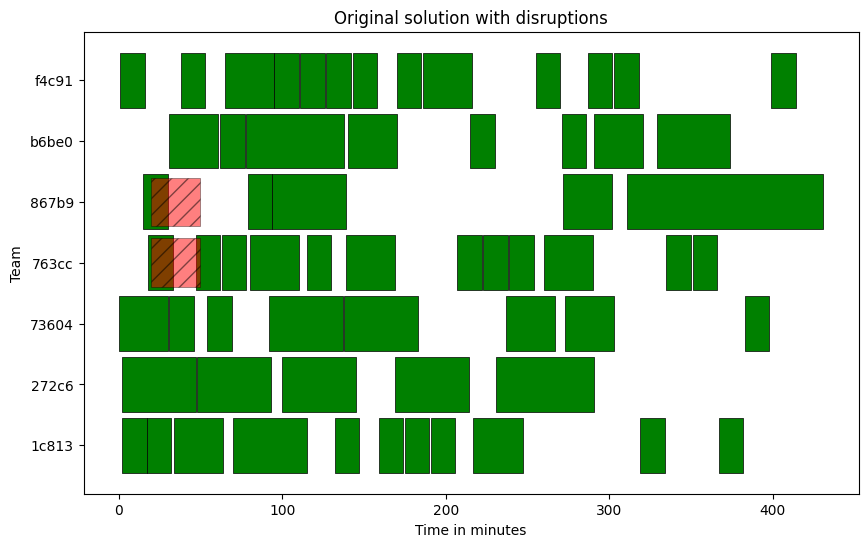

In [10]:
from generator import generate_disruption

disruption = generate_disruption(
    num_disruptions=(1,1), num_teams_affected=(2,2), duration=(15,30),
    horizon=sol.end.max(), teams = used_teams
)

model = FeasibilityResotorationModel(tasks, calendars, same_allocation, disruption=disruption)
model.set_original_solution(sol)

model.visualize_original_solution_with_disruptions()

In [11]:
model.set_lexico_objectives(*zip(*([
    (model.nb_of_done_tasks(), False),
    (model.nb_of_reallocated_tasks(), True),
    (model.nb_of_shifted_tasks(),True),
    (model.sum_of_shifted_tasks(), True),
    (model.max_of_shifted_tasks(), True)
])))

model.solve(time_limit=5)

Objective value: 62
Objective value: 0
Objective value: 4
Objective value: 28
Objective value: 13


True

In [12]:
model.solver_stati

[ExitStatus.OPTIMAL (0.07177412600000001 seconds),
 ExitStatus.OPTIMAL (0.052384704000000004 seconds),
 ExitStatus.OPTIMAL (0.033772027 seconds),
 ExitStatus.OPTIMAL (0.019624373 seconds),
 ExitStatus.OPTIMAL (0.019597965000000002 seconds)]

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Repaired solution using re-allocation and re-scheduling of tasks'}, xlabel='Time in minutes', ylabel='Team'>)

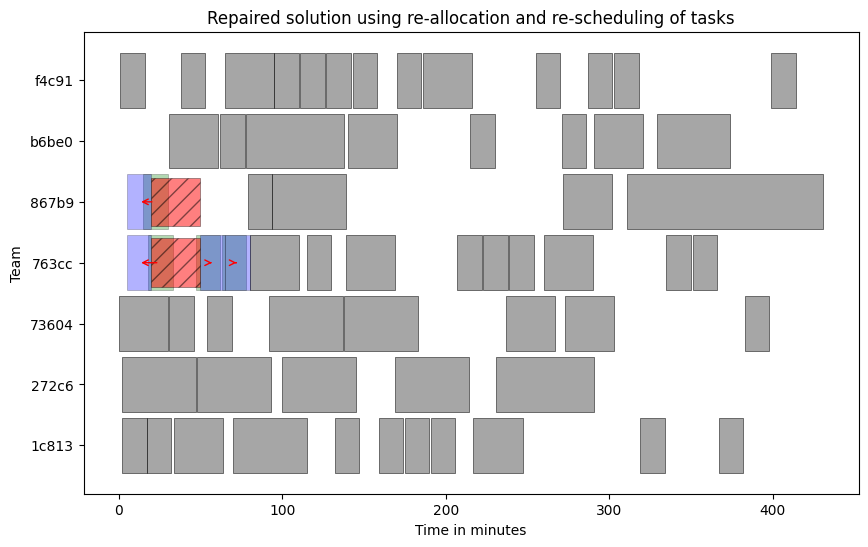

In [13]:
model.visualize_repair()